In [1]:
import cv2
import json
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

In [2]:
def get_object_names(scenegraph):
    names = []
    for _, val in scenegraph.items():
        names.append(val['name'])
    return names
# scene_id need to be str
def get_scene_graph(scene_id):
    return d[scene_id]['objects']
def get_object_count(scenegraph):
    return len(scenegraph)

# color generator 
def generate_bgr_colors(num_colors):
    # Generate a list of `num_colors` distinct colors using a colormap
    colormap = plt.cm.get_cmap('hsv', num_colors)
    colors_rgb = [colormap(i)[:3] for i in range(num_colors)]
    
    # Convert RGB to BGR and scale from 0-1 to 0-255
    colors_bgr = [(int(r * 255), int(g * 255), int(b * 255)) for r, g, b in colors_rgb]
    return colors_bgr

# Function to draw a rectangle
def draw_rectangle(img, top_left, bottom_right, color, thickness):
    cv2.rectangle(img, top_left, bottom_right, color, thickness)
    
# function to get list of rectangle values 
# rectangles: a list of tuples,
# each tuple contains 2 data points that are also invidually represented as a tuple
def get_rectagle_values(scene):
    rectangles = []
    labels = []
    for key, item in scene.items():
        val = ((item['x'], item['y']), 
           (item['x']+item['w'], item['y']+item['h']))
        label = f"{item['name']}: {key}"
        labels.append(label)
        rectangles.append(val)
    # if item['name'] == "air":
    #     labels.append(label)
    #     rectangles.append(val)
        objs_len = 1
    return rectangles, labels

def display_original_image(img):
    # # Convert BGR to RGB for proper display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with the rectangles
    plt.imshow(img_rgb)
    # plt.axis('off')  # Hide axes
    plt.show()

def display_image_with_labels(objs_len, rectangles, labels):
    # Define colors (BGR format)
    colors = generate_bgr_colors(objs_len)

    # Thickness of the rectangles
    thickness = 2

    # Draw the rectangles
    for i in range(objs_len):
        top_left, bottom_right = rectangles[i]
        color = colors[i]
        draw_rectangle(img, top_left, bottom_right, color, thickness)

    # # Convert BGR to RGB for proper display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with the rectangles
    plt.imshow(img_rgb)
    # plt.axis('off')  # Hide axes
    plt.show()

    # Convert BGR to RGB
    colors_rgb = [tuple(reversed(color)) for color in colors]  # Reverse each BGR tuple to get RGB

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Remove the axes
    ax.axis('off')

    # Create a grid of color patches with labels
    for i, (color, label) in enumerate(zip(colors_rgb, labels)):
        rect = plt.Rectangle((0, i), 1, 1, color=np.array(color) / 255)
        ax.add_patch(rect)
        ax.text(1.5, i + 0.5, label, va='center', ha='left', fontsize=12)

    # Set limits and aspect ratio to make the grid uniform
    ax.set_xlim(0, 2.5)
    ax.set_ylim(0, len(colors_rgb))
    ax.set_aspect('equal')

    # Display the colors with labels
    plt.show()

In [3]:
# load the scenegraph
with open("../data/sceneGraphs/val_sceneGraphs.json") as f:
    d = json.load(f)

In [4]:
# define ids
# ids = ['2406772']
ids = []
counter = 0
for key in d.keys():
    if counter < 20:
        ids.append(key)
        counter += 1

18


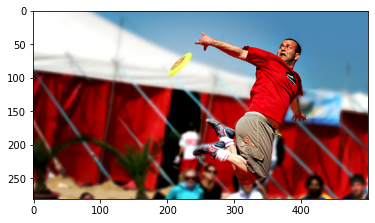

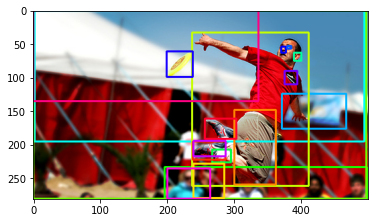

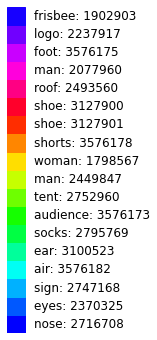

16


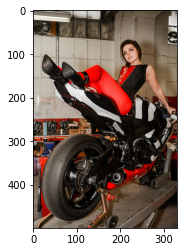

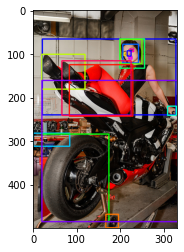

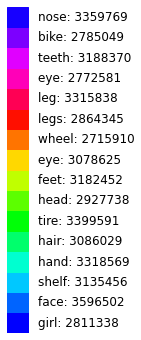

15


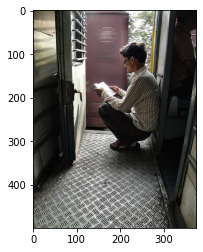

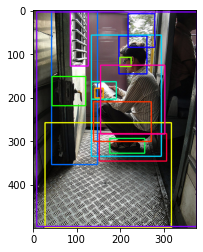

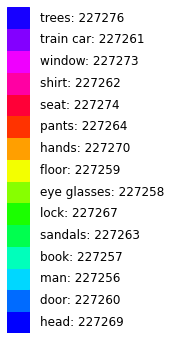

4


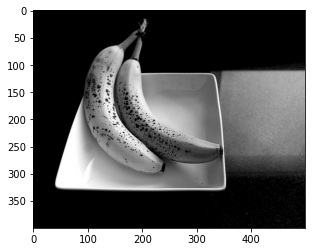

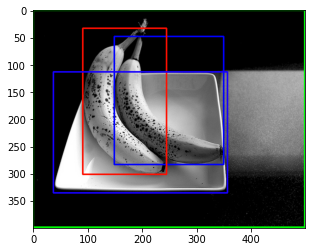

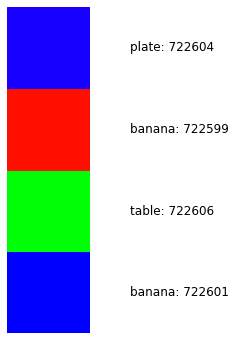

21


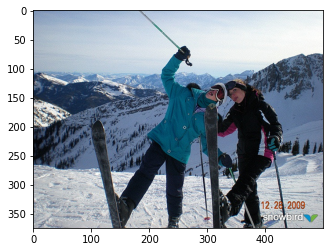

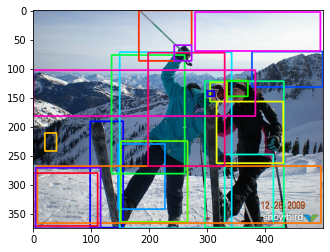

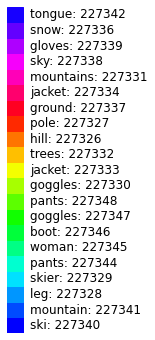

14


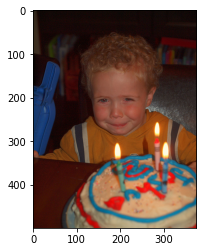

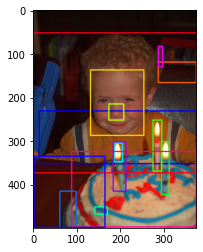

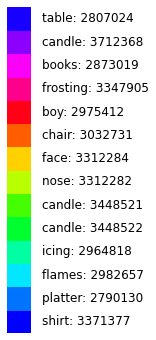

10


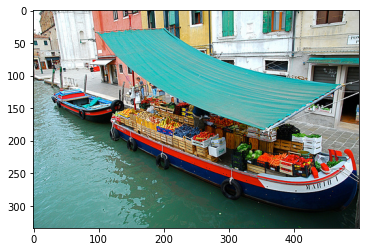

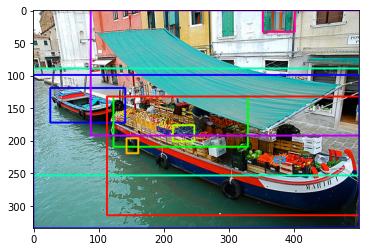

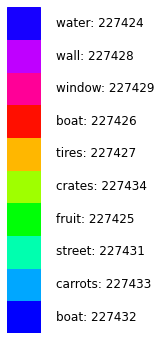

19


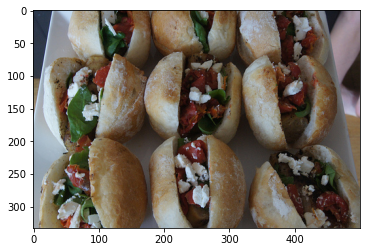

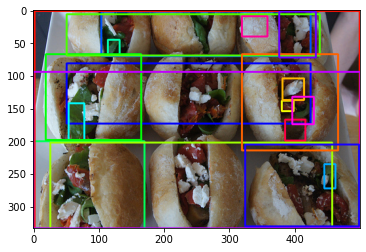

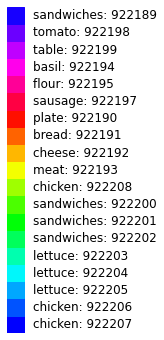

17


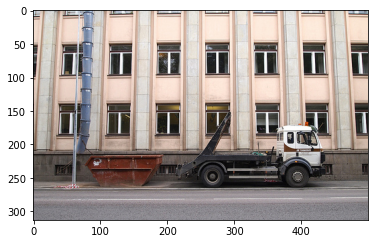

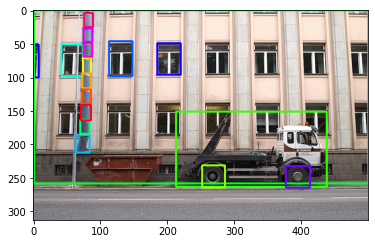

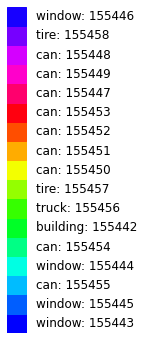

9


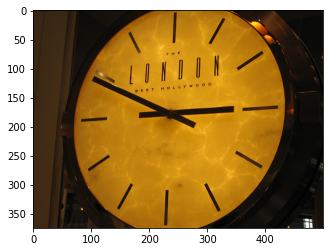

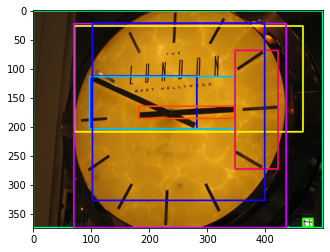

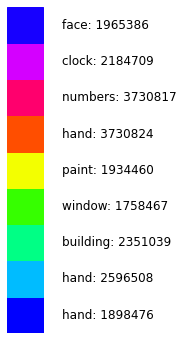

18


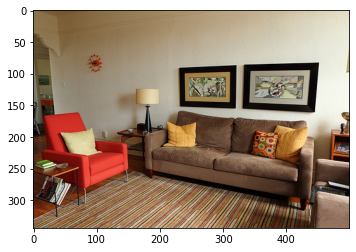

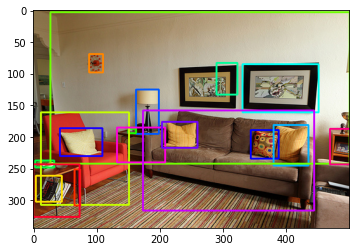

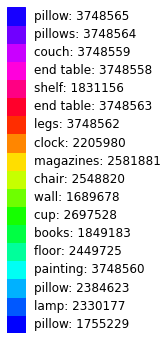

17


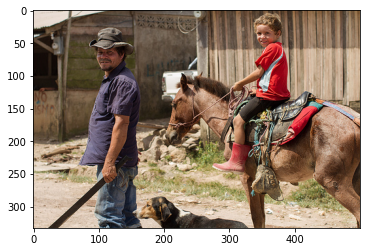

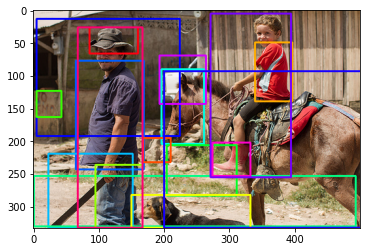

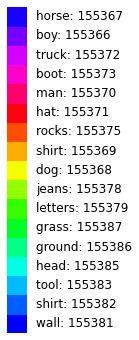

9


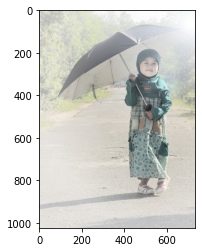

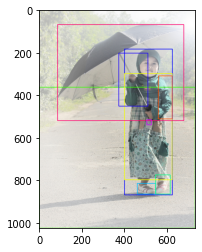

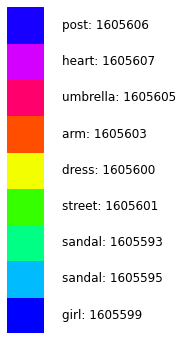

2


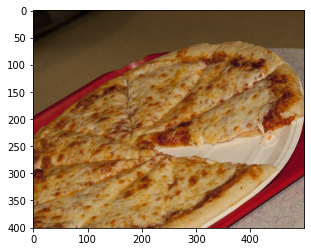

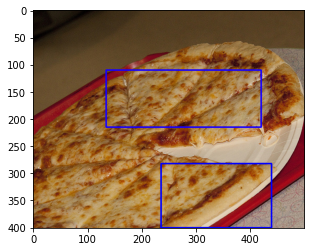

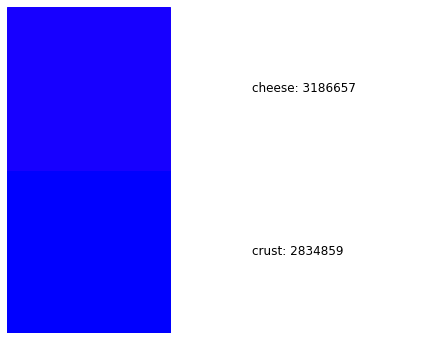

8


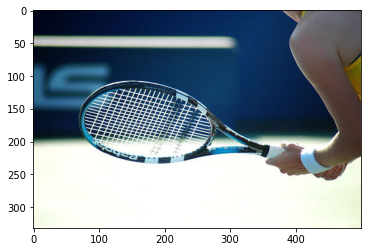

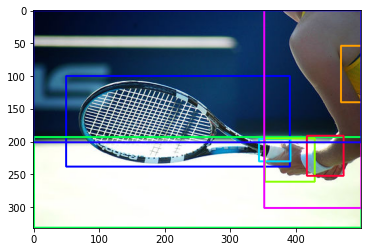

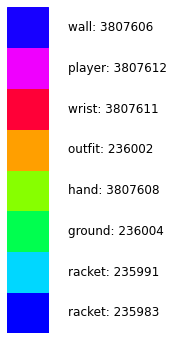

19


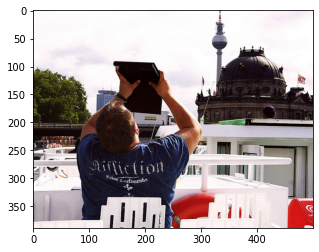

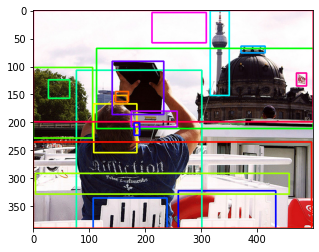

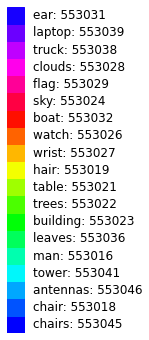

6


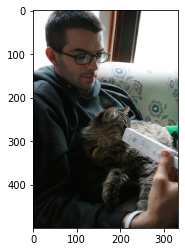

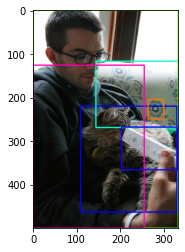

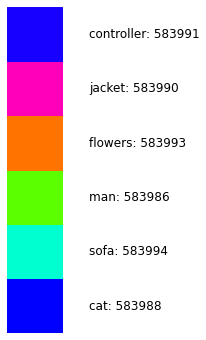

9


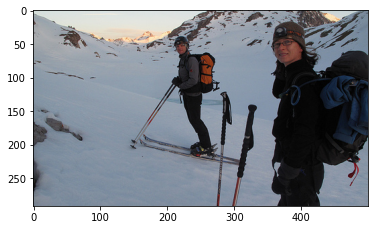

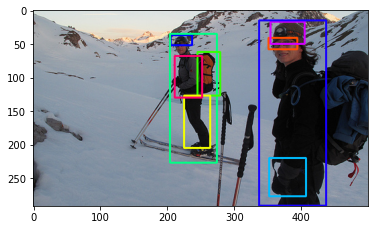

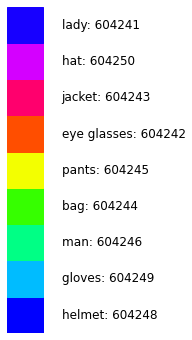

13


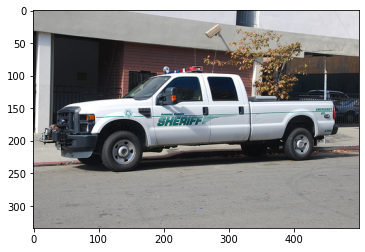

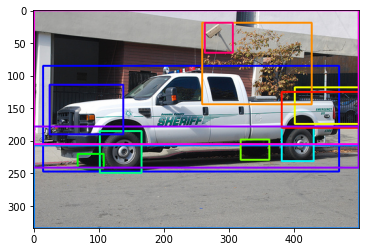

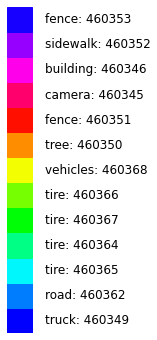

24


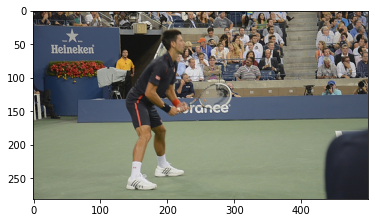

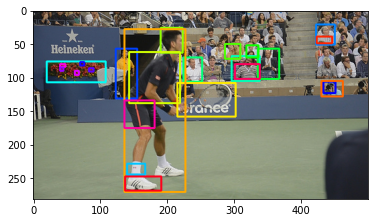

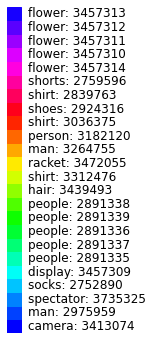

In [5]:
# Load the image
for item in ids:
    image_path = f"../../data/gqa/data/images/{item}.jpg" 
    img = cv2.imread(image_path)
    scene = get_scene_graph(item)
    objs_len = get_object_count(scene)
    print(objs_len)
    rectangles, labels = get_rectagle_values(scene)
    display_original_image(img)
    display_image_with_labels(objs_len, rectangles, labels)